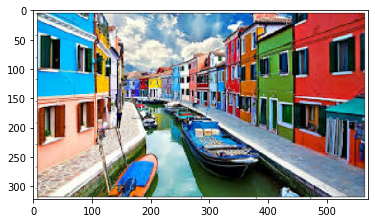

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Import the image
img = cv2.imread('w.png')
plt.imshow(img)

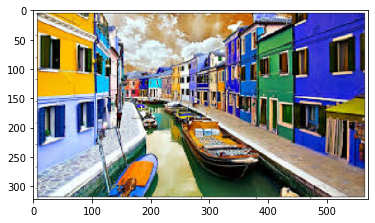

In [2]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

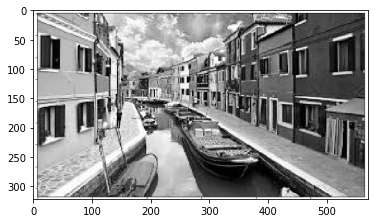

In [3]:
# Convert the image into gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

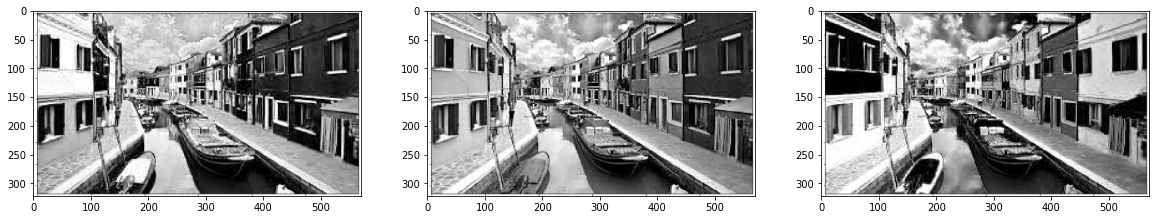

In [4]:
# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')
plt.show()

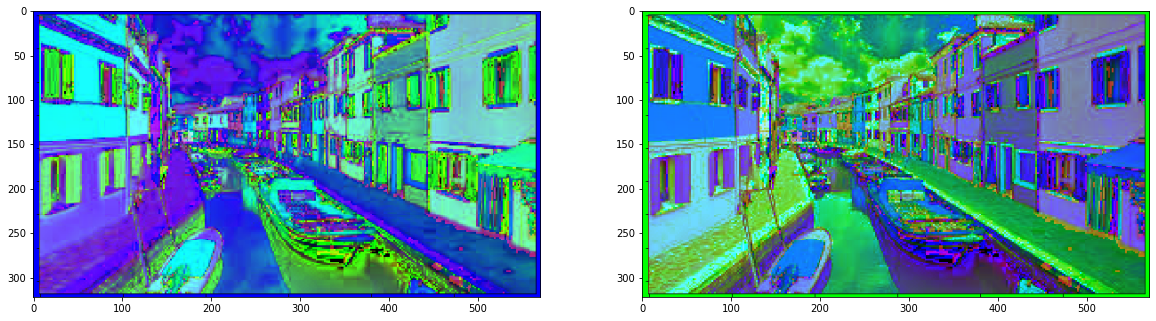

In [5]:
# Transform the image into HSV and HLS models
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# Plot the converted images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)
plt.show()

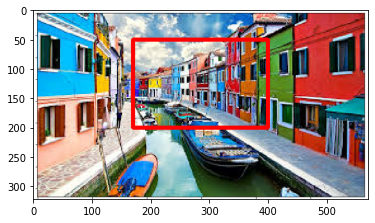

In [6]:
# Copy the image
img_copy = img.copy()
# Draw a rectangle 
cv2.rectangle(img_copy, pt1 = (170, 50), pt2 = (400, 200), 
              color = (255, 0, 0), thickness = 5)
plt.imshow(img_copy)

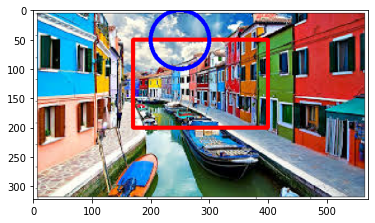

In [7]:
# Draw a circle 
cv2.circle(img_copy, center = (250, 50), radius = 50, 
           color = (0, 0, 255), thickness = 5)
plt.imshow(img_copy)

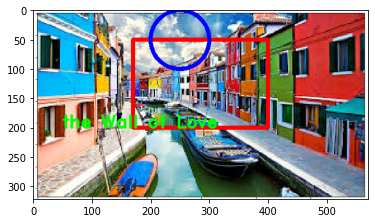

In [8]:
# Add text 
cv2.putText(img_copy, text = "the Wall of Love", 
            org = (50, 200),
            fontFace = cv2.FONT_HERSHEY_DUPLEX, 
            fontScale = 1, 
            color = (0, 255, 0), 
            thickness = 2, 
            lineType = cv2.LINE_AA)
plt.imshow(img_copy)

In [9]:
# Step 1. Define callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(img, center = (x, y), radius = 5, 
                       color = (87, 184, 237), thickness = -1)
    elif event == cv2.EVENT_RBUTTONDOWN:        
            cv2.circle(img, center = (x, y), radius = 10,  
                       color = (87, 184, 237), thickness = 1)

In [10]:
# Step 2. Call the window
img = cv2.imread('w.png')
cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)
# Step 3. Execution
while True:
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np

# Step 1. Define callback function
drawing = False
ix = -1
iy = -1

def draw_rectangle(event, x, y, flags, params):

    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                          color = (87, 184, 237), thickness = -1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                      color = (87, 184, 237), thickness = -1)
        
    
# Step 2. Call the window
img = cv2.imread('w.png')

cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_rectangle)


# Step 3. Execution 
while True: 
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(10) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [2]:
import cv2 
import pytesseract

img = cv2.imread('m.png')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'lam curious about\narea-filling text\nrendering options\n\x0c'

In [3]:
import cv2
import pytesseract
import numpy as np

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [4]:
image = cv2.imread('m.png')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [5]:
cv2.imshow('my_drawing',canny)
cv2.waitKey(0) 

-1

In [6]:
pytesseract.image_to_string(canny, config=custom_config)

'J am curious about\narea-filling text\nieemaeleralinremovenuiorals\n\x0c'

In [7]:
import cv2
import pytesseract

img = cv2.imread('m.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

In [13]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('q.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(round(float(d['conf'][i]),0)) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


-1

In [15]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('q.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(round(float(d['conf'][i]),0)) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1